# Sklearn

## sklearn.liner_model

**linear_model:**
* RidgeClassifier
* SGDClassifier
* SGDRegressor
* LinearRegression
* LogisticRegression
* Lasso
* etc

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Генерация данных

In [3]:
blobs = datasets.make_blobs(centers = 2, cluster_std = 5.5, random_state=1)

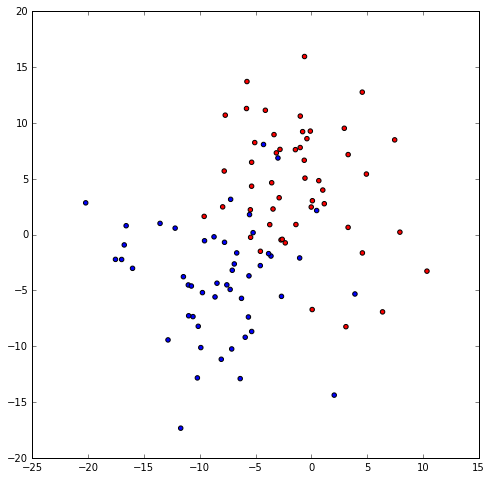

In [4]:
colors = ListedColormap(['red', 'blue'])

pylab.figure(figsize(8, 8))
pylab.scatter(map(lambda x: x[0], blobs[0]), map(lambda x: x[1], blobs[0]), c = blobs[1], cmap = colors)

In [5]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

### Линейная классификация

#### RidgeClassifier

In [6]:
#создание объекта - классификатора
ridge_classifier = linear_model.RidgeClassifier(random_state = 1)

In [7]:
#обучение классификатора
ridge_classifier.fit(train_data, train_labels)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=1, solver='auto',
        tol=0.001)

In [8]:
#применение обученного классификатора
ridge_predictions = ridge_classifier.predict(test_data)

In [9]:
print test_labels

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [10]:
print ridge_predictions

[0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [11]:
#оценка качества классификации
metrics.accuracy_score(test_labels, ridge_predictions)

0.8666666666666667

In [12]:
ridge_classifier.coef_

array([[-0.0854443 , -0.07273219]])

In [13]:
ridge_classifier.intercept_ 

array([-0.31250723])

#### LogisticRegression

In [14]:
log_regressor = linear_model.LogisticRegression(random_state = 1)

In [15]:
log_regressor.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
lr_predictions = log_regressor.predict(test_data)

In [17]:
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [18]:
print test_labels

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [19]:
print lr_predictions

[0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [20]:
print lr_proba_predictions

[[ 0.99873457  0.00126543]
 [ 0.38956803  0.61043197]
 [ 0.45000737  0.54999263]
 [ 0.00536816  0.99463184]
 [ 0.70965944  0.29034056]
 [ 0.23304944  0.76695056]
 [ 0.98983143  0.01016857]
 [ 0.9709671   0.0290329 ]
 [ 0.93909394  0.06090606]
 [ 0.15103335  0.84896665]
 [ 0.90324667  0.09675333]
 [ 0.0100448   0.9899552 ]
 [ 0.82338574  0.17661426]
 [ 0.05238427  0.94761573]
 [ 0.00443451  0.99556549]
 [ 0.00102911  0.99897089]
 [ 0.20817393  0.79182607]
 [ 0.91074564  0.08925436]
 [ 0.22580526  0.77419474]
 [ 0.00101709  0.99898291]
 [ 0.09600944  0.90399056]
 [ 0.99367624  0.00632376]
 [ 0.9779897   0.0220103 ]
 [ 0.29889823  0.70110177]
 [ 0.00210487  0.99789513]
 [ 0.00929423  0.99070577]
 [ 0.2670277   0.7329723 ]
 [ 0.85210662  0.14789338]
 [ 0.98871444  0.01128556]
 [ 0.00407572  0.99592428]]


In [21]:
print metrics.accuracy_score(test_labels, lr_predictions)

0.8


In [22]:
print metrics.accuracy_score(test_labels, ridge_predictions)

0.866666666667


### Оценка качества по cross-validation

#### cross_val_score

In [23]:
ridge_scoring = cross_validation.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [24]:
lr_scoring = cross_validation.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [25]:
lr_scoring

array([ 0.7,  0.9,  0.9,  0.9,  1. ,  1. ,  0.7,  0.9,  0.9,  0.8])

In [26]:
print 'Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std())

Ridge mean:0.88, max:1.0, min:0.7, std:0.0871779788708


In [27]:
print 'Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std())

Log mean:0.87, max:1.0, min:0.7, std:0.100498756211


#### cross_val_score с заданными scorer и cv_strategy

In [28]:
scorer = metrics.make_scorer(metrics.accuracy_score)

In [29]:
cv_strategy = cross_validation.StratifiedShuffleSplit(blobs[1], n_iter = 20 , test_size = 0.3, random_state = 2)

In [30]:
ridge_scoring = cross_validation.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [31]:
lr_scoring = cross_validation.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [32]:
print 'Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std())

Ridge mean:0.87, max:1.0, min:0.766666666667, std:0.0595352369983


In [33]:
print 'Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std())

Log mean:0.876666666667, max:1.0, min:0.766666666667, std:0.0615539510421
